In [1]:
library(astsa)
library(dplyr)
library(tidyr)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)
file_name = "/data/gao.csv"

In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, file_name, sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,X,value
,<chr>,<dbl>
1,2020-01-01,196457.2
2,2020-02-01,234036.2
3,2020-03-01,270315.1
4,2020-04-01,289980.0
5,2020-05-01,508904.1
6,2020-06-01,217378.0


In [4]:
colnames(df)[colnames(df) == "X"] <- "date"
df$date <- as.Date(df$date)
df <- df[order(df$date), ]

In [5]:
df

,date,value
,<date>,<dbl>
58,2019-01-01,195310.4
59,2019-02-01,116283.5
60,2019-03-01,298378.6
61,2019-04-01,283342.4
62,2019-05-01,291187.4
63,2019-06-01,264207.2
64,2019-07-01,260978.8
65,2019-08-01,283836.7
66,2019-09-01,210778.0


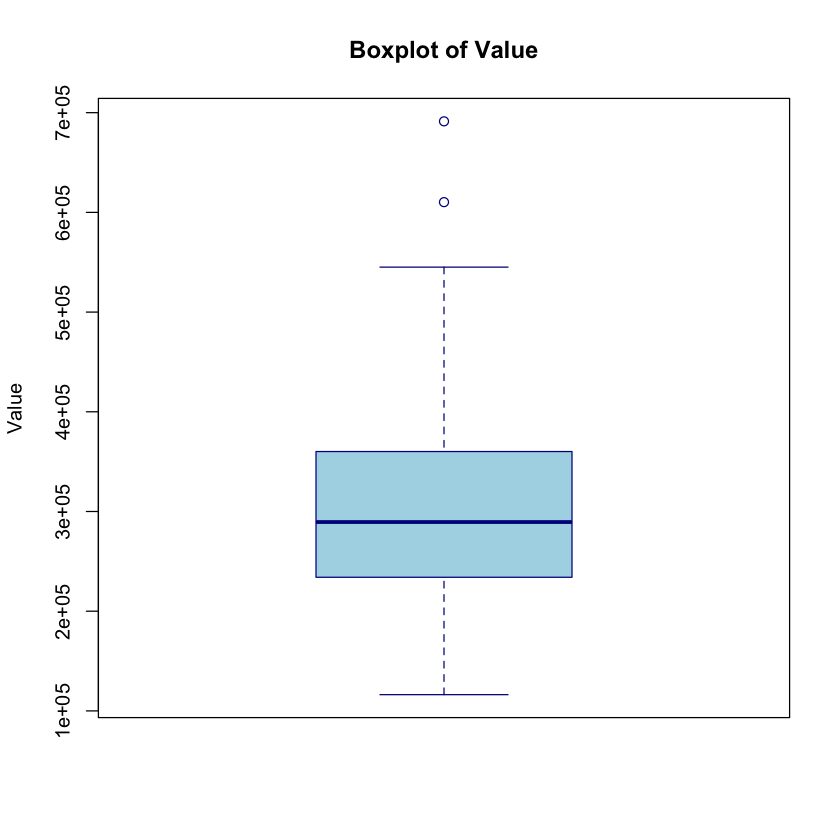

In [6]:
# Vẽ box plot cho cột 'value'
boxplot(df$value, 
        main = "Boxplot of Value",   # Tiêu đề của boxplot
        ylab = "Value",              # Nhãn trục y
        col = "lightblue",           # Màu sắc của boxplot
        border = "darkblue")         # Màu sắc viền boxplot

- Dữ liệu có một vài giá trị ngoại lai

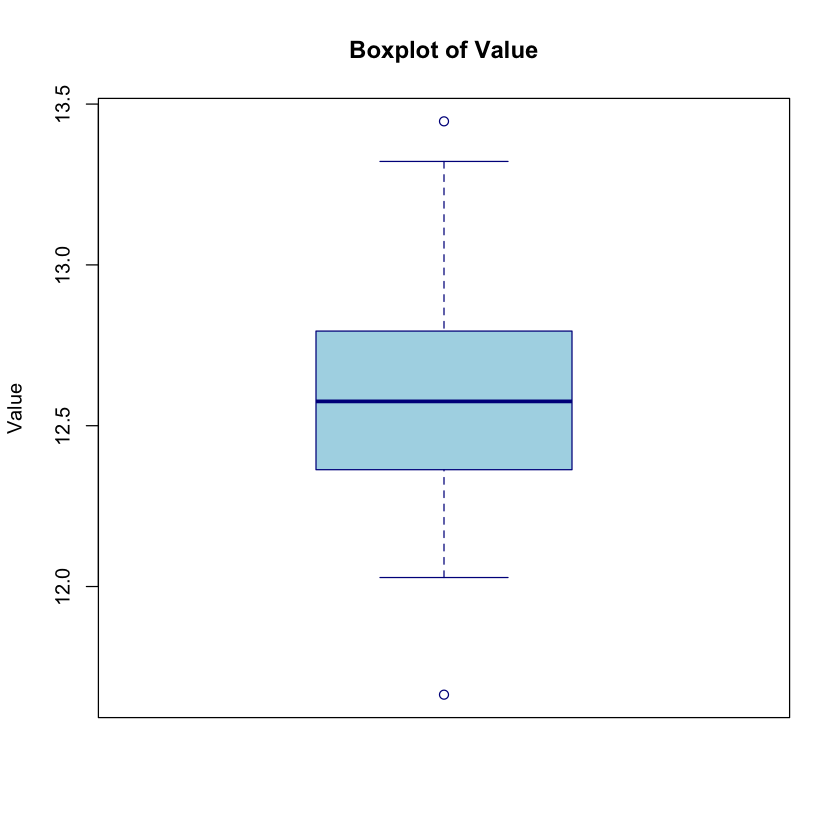

In [7]:
# Vẽ box plot cho cột 'value'
boxplot(log(df$value), 
        main = "Boxplot of Value",   # Tiêu đề của boxplot
        ylab = "Value",              # Nhãn trục y
        col = "lightblue",           # Màu sắc của boxplot
        border = "darkblue")         # Màu sắc viền boxplot

- Sau khi biến đổi log cho dữ liệu, các yếu tố ngoại lai đã được giảm đi: Giá trị ngoại lai có ảnh hưởng lớn hơn trong dữ liệu gốc. Lấy log giảm mức độ ảnh hưởng của các giá trị ngoại lai.

- Từ biểu đồ Boxplot ta thấy rằng dữ liệu có mọto số điểm ngoại lai nhưng nhìn chung nó không đáng kể

In [8]:
total_missing <- sum(is.na(df))
total_missing

[1] 0

- Không có missing value trong bộ dữ liệu

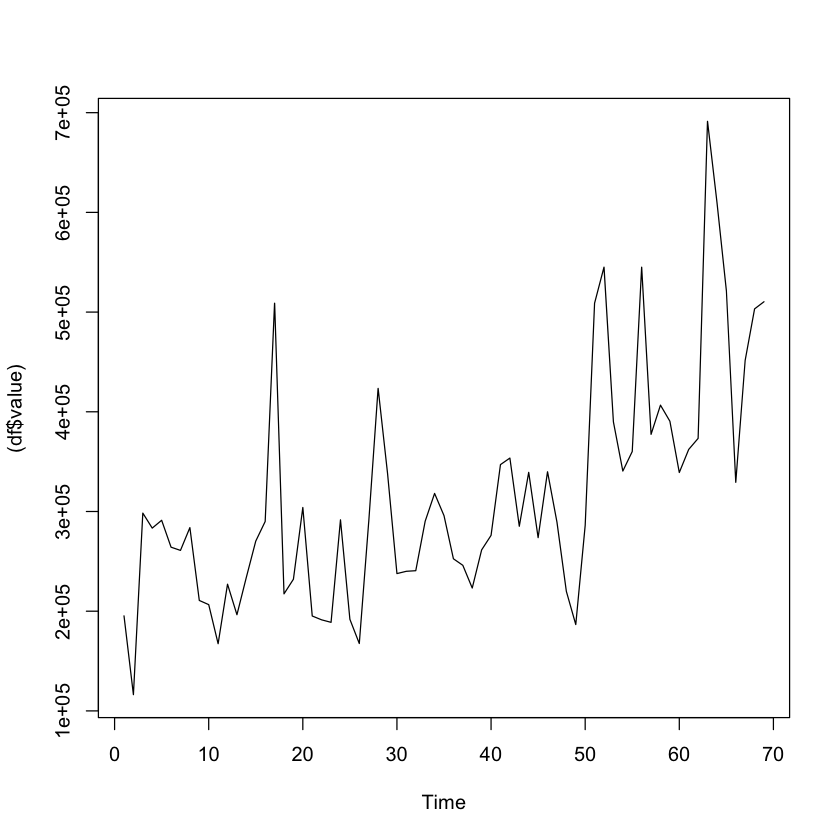

In [9]:
plot.ts((df$value))

- Biểu đồ biểu thị Giá trị gaọ xuất khẩu qua các năm.
- Ta nhận thấy rằng, sự biến động của giá trị xuất khẩu mỗi năm tuân theo chu kỳ: lượng tiền xuất khẩu tăng theo chu kỳ mỗi năm vào 3 tháng (Khoảng tháng 4, tháng 8 và tháng 11), đây là thời gian thu hoạch lúa trong năm.
- Từ giữa năm 2021 đến năm 2022, giá trị lúa xuất khẩu bị ảnh hưởng (tháng 8 và tháng 11 bị gộp lại thành 1 đỉnh) do ảnh hưởng của dịch covid.
- Nhưng khoảng cách giữa các mùa là không bằng nhau, nên ta sẽ xét yếu tố chu kì là 12 tháng
- Kể từ năm 2023 đến nay, lượng tiền thu được từ xuất khẩu lúa gạo có sự tăng vọt so với các năm trước nhưng vẫn giữ nguyên tính chu kì.

- Vậy dữ liệu có xu hướng tăng: Trending: Detrending bằng differencing.
- Dữ liệu có tuân theo chu kì: Seasonal: Xây dựng mô hình Sarima có tính seasonal.


In [10]:
df<-ts(df[,-1],start=c(2019,1),deltat=1/12)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,195310.4,116283.5,298378.6,283342.4,291187.4,264207.2,260978.8,283836.7,210778.0,206592.4,167373.6,227084.9
2020,196457.2,234036.2,270315.1,289980.0,508904.1,217378.0,232046.6,304035.8,195185.1,191329.3,188829.1,291647.7
2021,191882.1,167575.4,289182.0,423476.2,338351.4,237724.3,240022.7,240621.4,290236.9,318123.1,295853.2,252580.0
2022,246024.5,223236.4,261500.8,276045.9,347032.5,353586.9,285180.8,339259.3,273747.6,339842.9,289417.2,219890.0
2023,186599.1,285830.9,508961.6,545086.0,389819.4,340557.0,360135.0,545027.1,377371.8,406672.1,390540.7,339094.9
2024,362260.6,373320.3,691320.4,610271.0,521624.5,329274.9,451638.7,503214.4,510394.0,,,


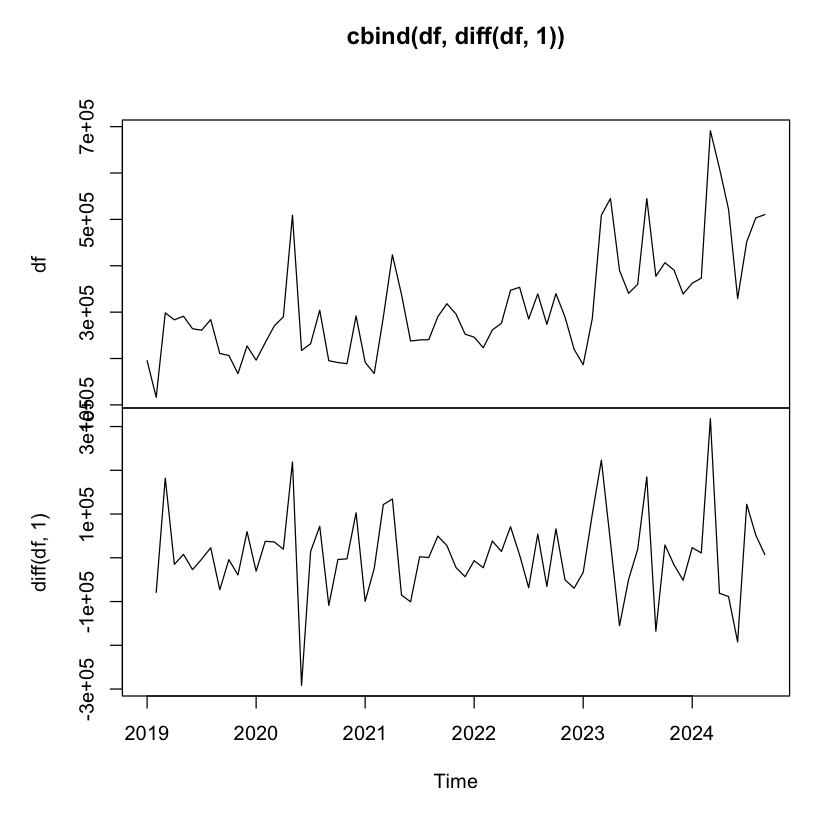

In [11]:
plot.ts(cbind(df, diff(df, 1)))

### NHẬN XÉT

- Vì dữ liệu có trend và có phương sai tăng dần, do đó ta sử dụng hàm log để ổn định lại phương sai của dữ liệu

In [12]:
df_log <- log(df)

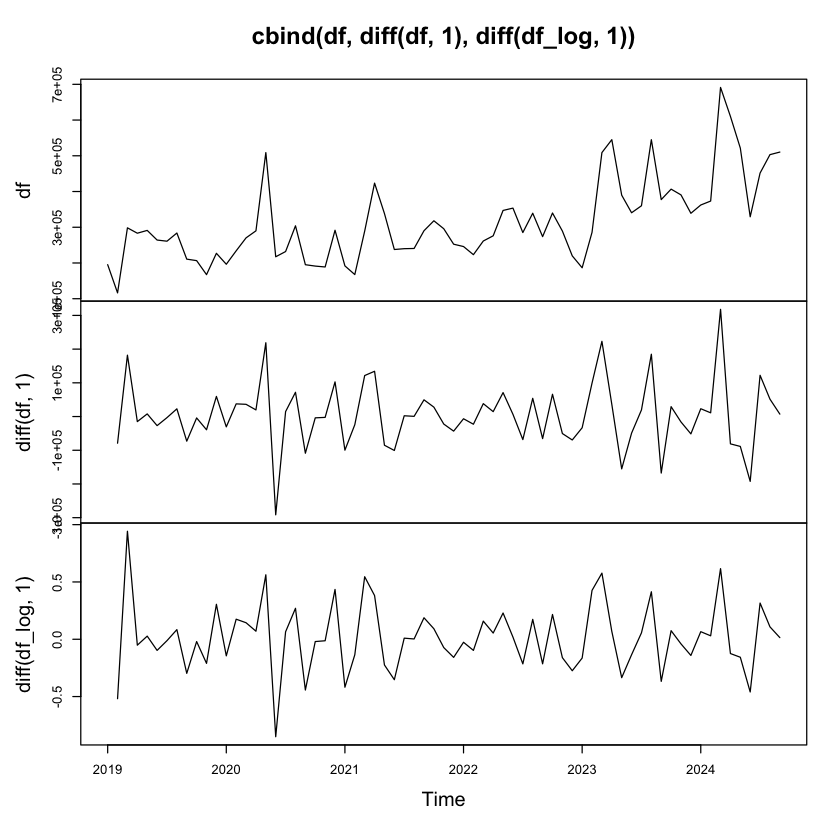

In [13]:
plot.ts(cbind(df, diff(df, 1), diff(df_log,1)))

#### NHẬN XÉT
- Nhìn vào biểu đồ số 3 (diff(df_log, 1)) ta thấy rằng:
    - Đã loại bỏ được trending
    - Phương sai ổn định qua mỗi năm

ACF,-0.22,-0.19,-0.18,0.05,0.16,-0.26,0.16,-0.08,0.00,-0.12,...,0.13,-0.06,0.05,-0.15,0.08,0.02,-0.13,0.03,0.08,0.14
PACF,-0.22,-0.25,-0.31,-0.18,0.01,-0.34,0.00,-0.18,-0.21,-0.34,...,0.16,-0.03,-0.16,-0.09,-0.11,-0.09,0.04,-0.12,0.02,-0.03


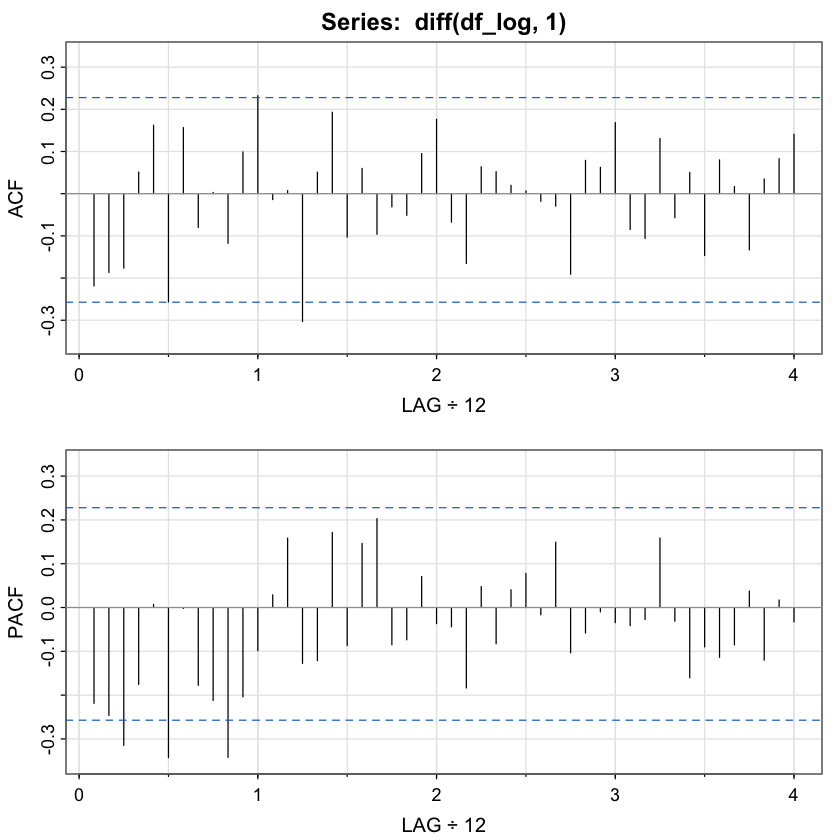

In [14]:
acf2(diff(df_log, 1))

### NHẬN XÉT

- ACF: Tail off
- PACF: Cut off

### THỬ MÔ HÌNH

initial  value -1.301564 
iter   2 value -1.407890
iter   3 value -1.415914
iter   4 value -1.418074
iter   5 value -1.418291
iter   6 value -1.418292
iter   6 value -1.418292
final  value -1.418292 
converged
initial  value -1.395987 
iter   2 value -1.396265
iter   3 value -1.396277
iter   4 value -1.396277
iter   4 value -1.396277
iter   4 value -1.396277
final  value -1.396277 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
sar1      -0.4377 0.1218 -3.5952   7e-04
constant   0.0115 0.0020  5.7704   0e+00

sigma^2 estimated as 0.05858149 on 55 degrees of freedom 
 
AIC = 0.1505868  AICc = 0.1544854  BIC = 0.2581158 
 


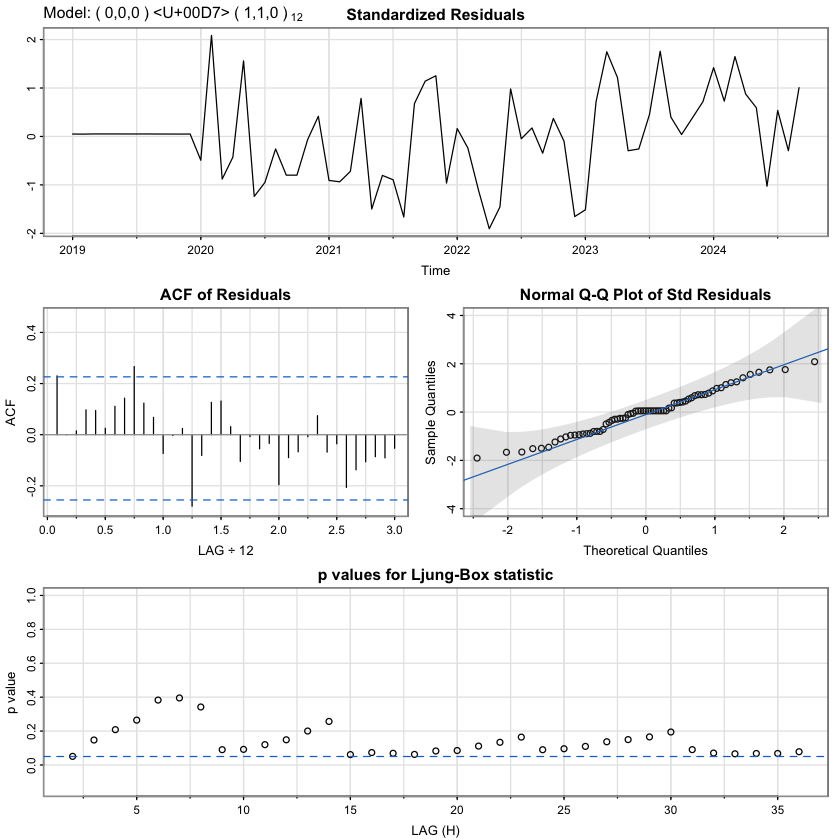

In [15]:
model_1 = sarima(df_log, 0, 0, 0, 1, 1, 0, 12)

initial  value -1.303814 
iter   2 value -1.409247
iter   3 value -1.423492
iter   4 value -1.435048
iter   5 value -1.436788
iter   6 value -1.439456
iter   7 value -1.439498
iter   8 value -1.439582
iter   8 value -1.439582
iter   8 value -1.439582
final  value -1.439582 
converged
initial  value -1.436571 
iter   2 value -1.437914
iter   3 value -1.439882
iter   4 value -1.440926
iter   5 value -1.441208
iter   6 value -1.441261
iter   7 value -1.441262
iter   8 value -1.441265
iter   9 value -1.441267
iter   9 value -1.441267
iter   9 value -1.441267
final  value -1.441267 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
sma1      -0.8343 0.4373 -1.9077  0.0617
constant   0.0113 0.0013  9.0313  0.0000

sigma^2 estimated as 0.04483317 on 55 degrees of freedom 
 
AIC = 0.06060527  AICc = 0.06450391  BIC = 0.1681343 
 


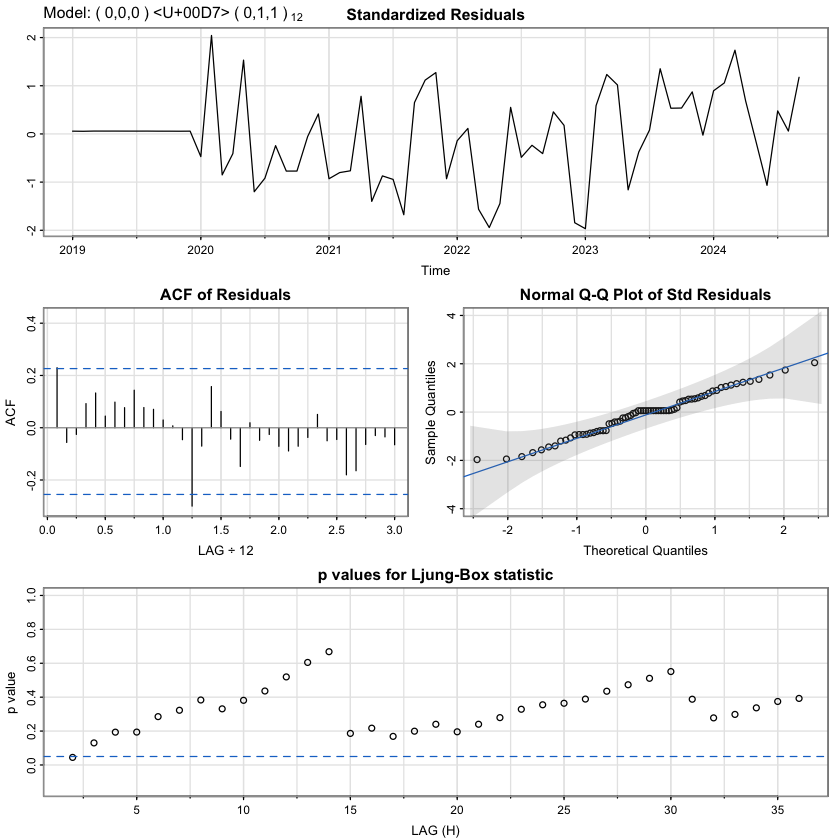

In [16]:
model_2 = sarima(df_log, 0, 0, 0, 0, 1, 1, 12)

initial  value -1.301564 
iter   2 value -1.379055
iter   3 value -1.398552
iter   4 value -1.414039
iter   5 value -1.418447
iter   6 value -1.418762
iter   7 value -1.419270
iter   8 value -1.419334
iter   9 value -1.419341
iter  10 value -1.419342
iter  11 value -1.419342
iter  12 value -1.419344
iter  12 value -1.419344
iter  12 value -1.419344
final  value -1.419344 
converged
initial  value -1.402549 
iter   2 value -1.403589
iter   3 value -1.408294
iter   4 value -1.419452
iter   5 value -1.434942
iter   6 value -1.439121
iter   7 value -1.444710
iter   8 value -1.445659
iter   9 value -1.445673
iter  10 value -1.445724
iter  11 value -1.445729
iter  12 value -1.445731
iter  13 value -1.445734
iter  14 value -1.445735
iter  15 value -1.445735
iter  15 value -1.445735
final  value -1.445735 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
sar1       0.1202 0.1668  0.7208  0.4742
sma1      -0.9999 0.4171 -2.3974  0.0200
constant   

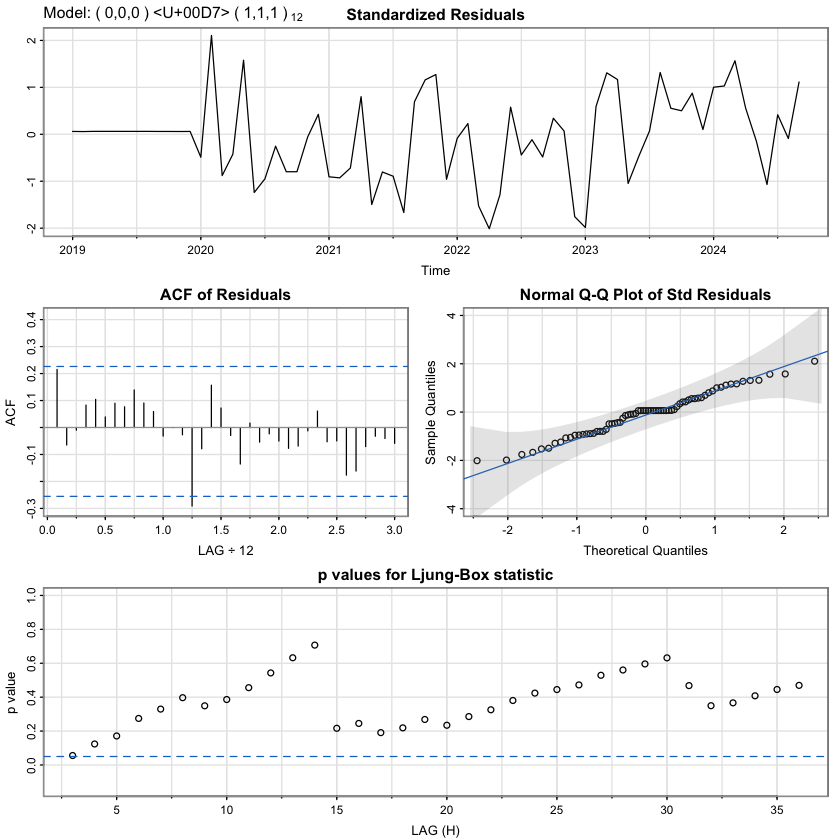

In [17]:
model_3 = sarima(df_log, 0, 0, 0, 1, 1, 1, 12)

$$
\begin{array}{|l|c|c|c|}
\hline
\textbf{Mô hình} & \textbf{AIC} & \textbf{BIC} & \textbf{AICc} \\ \hline
\text{SARIMA(0,0,0)(1,1,0)\_12} & 0.151 & 0.258 & 0.154 \\ \hline
\text{SARIMA(0,0,0)(0,1,1)\_12} & 0.061 & 0.168 & 0.065 \\ \hline
\text{SARIMA(0,0,0)(1,1,1)\_12} & 0.087 & 0.23 & 0.095 \\ \hline
\end{array}
$$


### NHẬN XÉT
- Mô hình 1: SARIMA(0,0,0)(1,1,0)\_12
    - AIC: 0.4545809
    - BIC: 0.5439069
    - Hệ số AR(1): -0.2271 (p-value = 0.0407)
- Nhận xét:
    - Hệ số AR(1) có ý nghĩa thống kê (p-value < 0.05).
    - AIC và BIC cao hơn so với các mô hình khác, cho thấy đây chưa phải mô hình tối ưu nhất.
- Mô hình 2: SARIMA(2,1,0)(0,0,0)
    - AIC: 0.4136118
    - BIC: 0.5327131
    - Hệ số AR(1): -2.5784 (p-value = 0.0118), kết quả tối ưu hơn SARIMA(1,1,0).
- Nhận xét:
    - AIC và BIC thấp hơn so với mô hình SARIMA(1,1,0), cho thấy cải thiện về độ phù hợp của mô hình.
    - Mô hình chưa phải tối ưu nhất khi so với SARIMA(3,1,0)
- Mô hình 3: SARIMA(3,1,0)(0,0,0)
    - AIC: 0.3468145
    - BIC: 0.4956911
    - Hệ số AR(1): -0.3544 (p-value = 0.0013)
    - Hệ số AR(2): -0.3429 (p-value = 0.0025)
    - Hệ số AR(3): -0.3048 (p-value = 0.0067)
- Nhận xét:
    - AIC và BIC thấp nhất trong 3 mô hình, cho thấy đây là mô hình phù hợp nhất.
    - Các hệ số AR đều có ý nghĩa thống kê (p-value < 0.01), cho thấy các thông số AR(1), AR(2), và AR(3) đóng góp đáng kể vào mô hình.

#### LỰA CHỌN MÔ HÌNH
- Mô hình SARIMA(0,0,0)(0,1,1)\_12 có chỉ số AIC và BIC thấp nhất trong cả ba mô hình, đồng thời số lượng tham số trong mô hình này cũng thấp nhất --> Mô hình đơn giản
- Do đó ta chọn mô hình SARIMA(0,0,0)(0,1,1)\_12 để tiến hành dự đoán

### THỰC HIỆN DỰ BÁO

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,436353.1,410296.3,379906.2
2025,371363.5,393323.9,606709.0,596607.6,537931.9,419605.0,466033.9,545927.0,492942.9,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,79223.59,79223.59,79223.59
2025,79140.02,79140.02,79140.02,79140.02,79140.02,79140.02,79140.02,79140.02,79140.02,,,


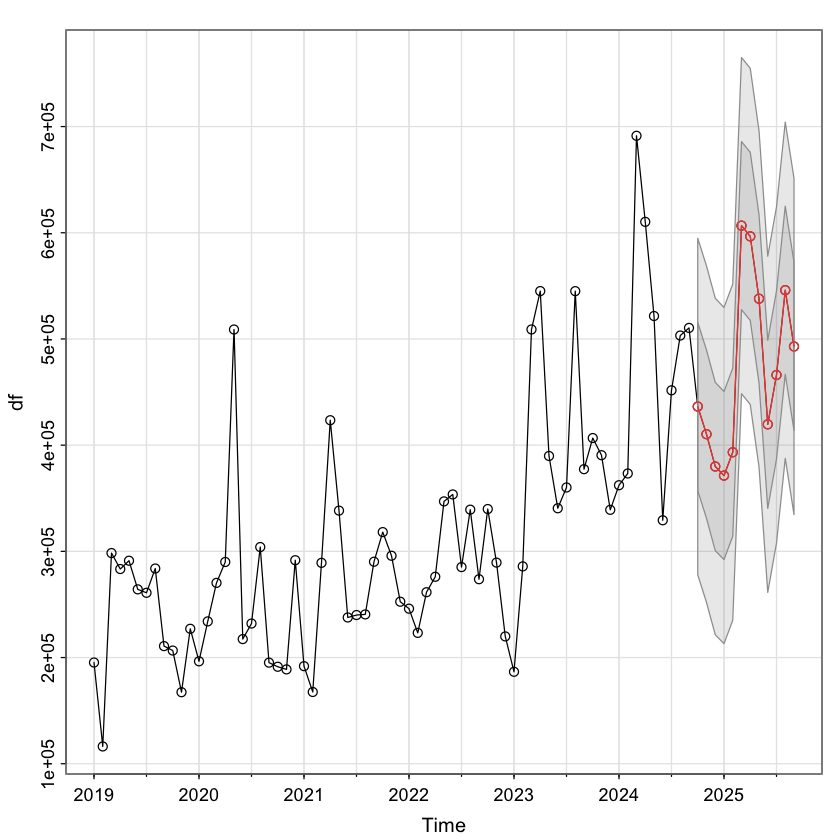

In [18]:
model_pred = sarima.for(df, n.ahead = 12, 0, 0, 0, 0, 1, 1, 12)
model_pred

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,12.96076,12.86367,12.87417
2025,12.78218,12.78443,13.28379,13.34016,13.33255,13.02364,13.07445,13.25438,13.07691,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,0.2179326,0.2179326,0.2179326
2025,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,,,


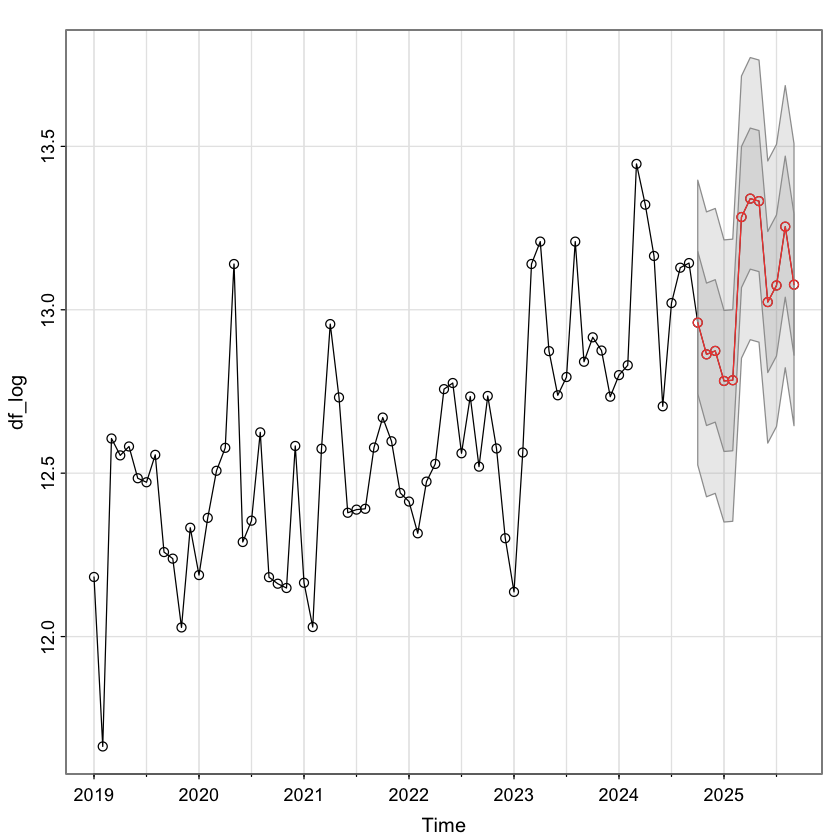

In [19]:
model_pred = sarima.for(df_log, n.ahead = 12, 0, 0, 0, 0, 1, 1, 12)
model_pred

In [20]:
# Giá trị dự báo
forecast <- model_pred$pred

# Sai số chuẩn
se <- model_pred$se


# Tính khoảng tin cậy 95%
z <- 1.96  # Hệ số cho mức ý nghĩa 95%
lower_bound <- forecast - z * se
upper_bound <- forecast + z * se


In [21]:
# Đưa về dữ liệu gốc
forecast = exp(forecast)
print("lower")
exp(lower_bound)
print("upper")
exp(upper_bound)

[1] "lower"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,277509.5,251832.6,254490.3
2025,233085.2,233610.1,384910.6,407230.0,404142.2,296740.6,312209.7,373755.3,312977.6,,,


[1] "upper"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,652069.4,591735.9,597980.8
2025,543185.8,544409.2,897002.6,949016.1,941820.2,691529.5,727579.0,871005.9,729368.6,,,


In [22]:
model_pred$se

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,0.2179326,0.2179326,0.2179326
2025,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,0.2158285,,,


In [24]:
forecast

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,425388.6,386029.0,390102.9
2025,355821.0,356622.4,587593.3,621665.4,616951.7,452995.4,476610.1,570563.8,477782.5,,,
